In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import pickle

In [23]:
df1 = pd.read_csv('matches_data.csv')
df2 = pd.read_csv('matches_data_1.csv')
chumma_df = pd.read_csv('chumma.csv')

train_df = pd.concat([df1, df2])
print(len(train_df))
train_chumma_df = pd.concat([train_df, chumma_df])

train_chumma_df.to_csv('train_data_set.csv', index=False)
print(len(train_chumma_df))

545
729


In [24]:
train_df = pd.read_csv('train_data_set.csv')
print(train_df.head)

<bound method NDFrame.head of      blue_win  blue_kills  blue_deaths  blue_assists  blue_kda  red_kills  \
0           0           0            0             0  0.000000          0   
1           1          39           21            57  4.571429         21   
2           1          39           17            62  5.941176         17   
3           1          24           10            29  5.300000         10   
4           0          17           31            30  1.516129         31   
..        ...         ...          ...           ...       ...        ...   
724         1          19            7            25  6.285714          7   
725         0          15           27            21  1.333333         27   
726         1          42           37            58  2.702703         35   
727         1          31           25            52  3.320000         25   
728         0          18           26            22  1.538462         26   

     red_deaths  red_assists   red_kda  blue_

In [ ]:
print(train_df.info())

In [ ]:
print(train_df.describe())
# mean is around 0.437 that means there are almost equal no of 1 and 0's, so it's not imbalanced classes rather very balanced.
# just judging based on accuracy shd be fine, no need of F1 score anol for balanced classes.

In [ ]:
pearson_corr = train_df.corr(method='pearson')['blue_win'].drop('blue_win')

# Calculate Spearman correlation
spearman_corr = train_df.corr(method='spearman')['blue_win'].drop('blue_win')

# Combine the results into a DataFrame for easy comparison
correlation_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

# Sort by absolute values of Pearson correlation for better readability
correlation_df = correlation_df.reindex(correlation_df['Pearson'].abs().sort_values(ascending=False).index)

print(correlation_df)

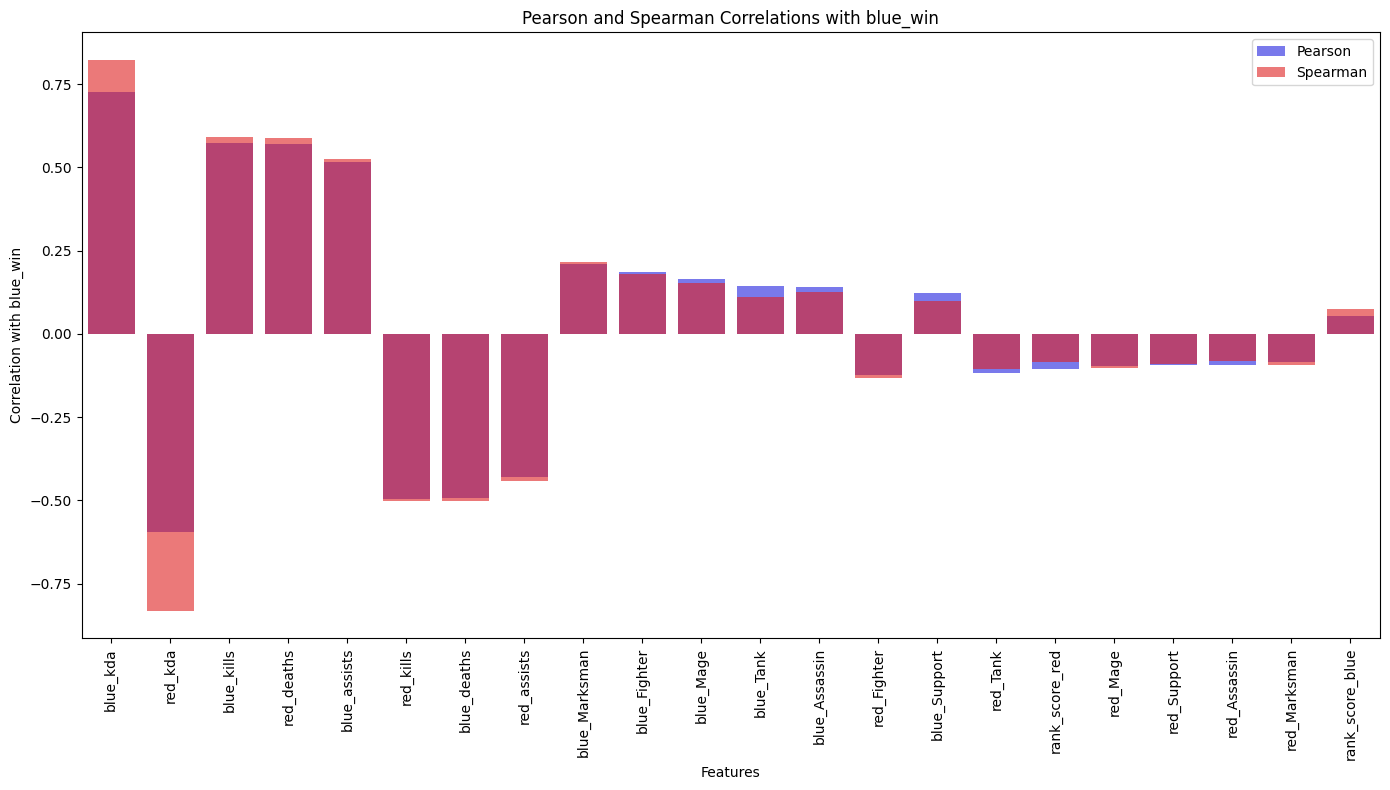

In [8]:
plt.figure(figsize=(14, 8))

# Plot Pearson correlations
sns.barplot(x=correlation_df.index, y=correlation_df['Pearson'], color='blue', alpha=0.6, label='Pearson')

# Plot Spearman correlations
sns.barplot(x=correlation_df.index, y=correlation_df['Spearman'], color='red', alpha=0.6, label='Spearman')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with blue_win')
plt.title('Pearson and Spearman Correlations with blue_win')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
X = train_df.drop(columns=['blue_win'])
y = train_df['blue_win']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
print(X_scaled)

[[-0.2790391   1.43374841 -0.34515041 ...  1.50639389 -0.50389225
  -0.33284755]
 [-1.42918776 -0.91119605 -1.23426773 ... -0.7135207  -0.78396675
  -0.59890971]
 [ 2.19820417  0.21437729  2.37159697 ... -0.16219383 -1.06404125
  -0.06678539]
 ...
 [ 0.60569064  0.40197285 -0.04877796 ...  1.77732031 -2.56944167
  -3.79165562]
 [-0.80987695  0.49577063 -0.93789529 ... -1.33509932  1.17655473
   1.2635254 ]
 [-0.80987695 -2.22436495 -0.83910447 ... -0.8064911   0.89648023
   1.2635254 ]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [12]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier()
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

model_scores = {}
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
    model_scores[model_name] = {
        'accuracy_mean': np.mean(accuracy_scores),
        'accuracy_std': np.std(accuracy_scores),
    }

# Create a DataFrame to display the results
model_scores_df = pd.DataFrame(model_scores).T
model_scores_df = model_scores_df[['accuracy_mean', 'accuracy_std']]

# Sort by F1-score for better readability
model_scores_df = model_scores_df.sort_values(by='accuracy_mean', ascending=False)

print(model_scores_df)

C:\Users\Ajay Kanna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ajay Kanna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

                     accuracy_mean  accuracy_std
Random Forest             0.949342      0.023912
Gradient Boosting         0.946711      0.020898
Logistic Regression       0.944737      0.023390
Decision Tree             0.938816      0.015858
SVM                       0.760526      0.045599
k-NN                      0.736184      0.035484


In [13]:
best_model_name = model_scores_df.index[0]
best_model_accuracy = model_scores_df['accuracy_mean'][0]
print(best_model_name, best_model_accuracy)

Random Forest 0.9493421052631579


C:\Users\Ajay Kanna\AppData\Local\Temp\ipykernel_99812\253401594.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_model_accuracy = model_scores_df['accuracy_mean'][0]


In [15]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'degree': [3, 5]
        }
    },
    'k-NN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

best_model = models[best_model_name]['model']
param_grid = models[best_model_name]['param_grid']

# Initialize GridSearchCV with the best model and its parameter grid
grid_search = GridSearchCV(best_model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to obtain the best parameters
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("Best Parameters for", best_model_name, ":", best_params)
print("Best Accuracy:", best_score)

Best Parameters for Random Forest : {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9539473684210525


In [16]:
best_model_info = {
    'model_name': best_model_name,
    'best_params': best_params,
    'best_accuracy': best_score
}

# Store best_model_info in a binary file using pickle
with open('best_model_info.pkl', 'wb') as f:
    pickle.dump(best_model_info, f)


In [26]:
import pickle

# Load best_model_info from the binary file
with open('best_model_info.pkl', 'rb') as f:
    best_model_info = pickle.load(f)

# Now best_model_info contains your stored information
print(best_model_info)

{'model_name': 'Random Forest', 'best_params': {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'best_accuracy': 0.9539473684210525}


In [31]:
# Load test data
test_df = pd.read_csv('chumma.csv')

# Ensure the test DataFrame has the same structure as the training DataFrame
X_test = test_df.drop(columns=['blue_win'])
y_test = test_df['blue_win']

# Assuming X_train was scaled with StandardScaler during training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # This is for reference, during training

# Scale the test data
X_test_scaled = scaler.transform(X_test)

C:\Users\Ajay Kanna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [32]:
best_model_name = best_model_info['model_name']
best_params = best_model_info['best_params']

# Initialize the model with the best parameters
if best_model_name == 'Logistic Regression':
    best_model = LogisticRegression(**best_params)
elif best_model_name == 'Random Forest':
    best_model = RandomForestClassifier(**best_params)
elif best_model_name == 'SVM':
    best_model = SVC(**best_params)
elif best_model_name == 'Gradient Boosting':
    best_model = GradientBoostingClassifier(**best_params)
elif best_model_name == 'Decision Tree':
    best_model = DecisionTreeClassifier(**best_params)
elif best_model_name == 'k-NN':
    best_model = KNeighborsClassifier(**best_params)
else:
    raise ValueError(f"Unsupported model: {best_model_name}")

# Fit the model on the entire training set (as the best parameters were found using cross-validation)
best_model.fit(X, y)

RandomForestClassifier(max_depth=30, n_estimators=200)

In [33]:
# Predict the test set results
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9402173913043478


C:\Users\Ajay Kanna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
